In [1]:
import numpy as np

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

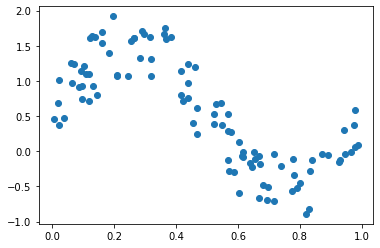

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

In [3]:
import sys
sys.path.append('..')
from dezero import *

In [4]:
y1 = F.sin(x)

In [5]:
y1.backward()

In [6]:
x1 = Variable(np.array(1))
y1 = F.square(x1)
y1.backward()
print(x1.grad)

variable(2)


In [7]:
x2 = Variable(np.array(1))
y2 = F.exp(x2)
y2.backward()
print(x2.grad)

variable(2.718281828459045)


In [8]:
x3 = Variable(np.array(0))
y3 = F.sigmoid(x3)
print(y3)
y3.backward()
print(x3.grad)

variable(0.5)
variable(0.25)


In [9]:
y3a = F.sigmoid_simple(Variable(np.array(0)))
print(y3a)
y3g = y3a * (1 - y3a)
print(y3g)

variable(0.5)
variable(0.25)


In [10]:
I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.rand(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

In [11]:
def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y

In [12]:
lr = 0.2
iters = 10000

In [13]:
for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)
    
    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    loss.backward()
    
    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    if i % 1000 == 0:
        print(loss)

variable(0.8475313866144301)
variable(0.25232389884593825)
variable(0.2500918056843659)
variable(0.24601237495288772)
variable(0.23309409381441137)
variable(0.20212246335742423)
variable(0.1445448518068143)
variable(0.08640252517630508)
variable(0.07825670987440754)
variable(0.07763945840744242)


In [14]:
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

In [15]:
x1 = np.arange(0, 1, 0.01).reshape((100, 1))
y1 = F.linear(F.sigmoid(F.linear(x1, W1, b1)), W2, b2)
#print(y1.data)

[[ 0.63571971]
 [ 0.68143117]
 [ 0.72686704]
 [ 0.77197704]
 [ 0.8167069 ]
 [ 0.86099804]
 [ 0.90478723]
 [ 0.94800623]
 [ 0.99058143]
 [ 1.03243347]
 [ 1.07347685]
 [ 1.11361954]
 [ 1.15276258]
 [ 1.19079973]
 [ 1.22761708]
 [ 1.26309273]
 [ 1.29709653]
 [ 1.32948983]
 [ 1.36012539]
 [ 1.38884732]
 [ 1.41549121]
 [ 1.4398844 ]
 [ 1.46184648]
 [ 1.48118999]
 [ 1.49772139]
 [ 1.51124242]
 [ 1.52155173]
 [ 1.52844696]
 [ 1.53172724]
 [ 1.5311961 ]
 [ 1.52666492]
 [ 1.51795681]
 [ 1.50491092]
 [ 1.48738718]
 [ 1.46527134]
 [ 1.43848019]
 [ 1.40696691]
 [ 1.3707263 ]
 [ 1.32979959]
 [ 1.28427881]
 [ 1.2343103 ]
 [ 1.18009717]
 [ 1.12190037]
 [ 1.06003843]
 [ 0.99488534]
 [ 0.92686682]
 [ 0.85645475]
 [ 0.78416004]
 [ 0.71052396]
 [ 0.63610836]
 [ 0.56148506]
 [ 0.4872248 ]
 [ 0.41388635]
 [ 0.34200601]
 [ 0.27208802]
 [ 0.20459626]
 [ 0.13994741]
 [ 0.0785058 ]
 [ 0.02058003]
 [-0.0335787 ]
 [-0.0837766 ]
 [-0.12987584]
 [-0.17179188]
 [-0.20948971]
 [-0.24297944]
 [-0.27231127]
 [-0.29757

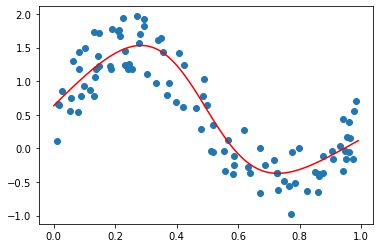

In [16]:
plt.plot(x1, y1.data, color='red')
plt.scatter(x, y)
plt.show()